In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_size = 1000
input_size = 100
r = 5
gen_dataset = np.random.uniform(-r,r,size=(data_size,input_size))
dis_dataset = np.random.normal(loc=0.0,scale=2.0,size=(data_size,input_size))

gen_dataset.sort()
gen_dataset = np.clip(gen_dataset,-r,r)
dis_dataset.sort()
dis_dataset = np.clip(dis_dataset,-r,r)

1.13117 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129
1.00136e-05 11.5129


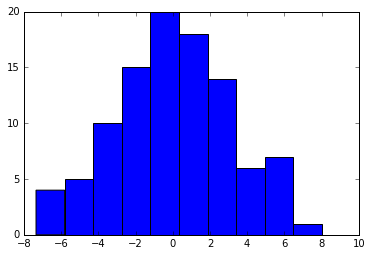

In [31]:
tf.reset_default_graph()

def linear(x,out_dim,scope,reuse=False):
    with tf.variable_scope(scope,reuse=reuse):
        w = tf.get_variable(name='w',shape=(x.shape[1].value,out_dim),
                        initializer=tf.random_normal_initializer(stddev=0.1))
        b = tf.get_variable(name='b',shape=(1,out_dim),
                        initializer=tf.random_normal_initializer(stddev=0.1))
        o = tf.matmul(x,w) + b
        return o
    
# generator model
x = tf.placeholder(dtype=tf.float32,shape=[None,input_size])
o = linear(x,100,'g0',False)

# discriminator model
d_h0 = tf.nn.relu(linear(o,20,'d0',False))
d_h1 = tf.nn.sigmoid(linear(d_h0,1,'d1',False))

d_x = tf.placeholder(dtype=tf.float32,shape=[None,input_size])
d1_h0 = tf.nn.relu(linear(d_x,20,'d0',True))
d1_h1 = tf.nn.sigmoid(linear(d1_h0,1,'d1',True))

# loss
dis_loss = tf.reduce_mean(-tf.log(tf.maximum(d1_h1, 1e-5))-tf.log(1-tf.maximum(d_h1, 1e-5)))
gen_loss = tf.reduce_mean(-tf.log(tf.maximum(d_h1, 1e-5)))

vv = tf.trainable_variables()
g_p = [v for v in vv if v.name.startswith('g')]
d_p = [v for v in vv if v.name.startswith('d')]

g_opt = tf.train.AdamOptimizer(0.1).minimize(gen_loss,var_list=g_p)
d_opt = tf.train.AdamOptimizer(0.1).minimize(dis_loss,var_list=d_p)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        _,d_l = sess.run([d_opt,dis_loss],{x:gen_dataset,d_x:dis_dataset})
        _,g_l = sess.run([g_opt,gen_loss],{x:gen_dataset,d_x:dis_dataset})
        if i % 10 == 0:
            print d_l,g_l
    r = sess.run(o,{x:gen_dataset})
    plt.hist(r[0])